# Summer School - Modeling Water Fluxes In The Soil-Plant System

## Simulating the growing root architecture and trait analysis

How to 

1. Simulate a root system 

2. Understanding model parameters 

3. Using confining containers or obstacles

4. Basic root system traits and their dynamics

5. Depth profiles

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG, display  # show svg files within jupyter

import plantbox as pb
from visualisation import vtk_plot as vp

sourcedir = "/home/jhack/phd/CPlantBox/"

### 1. Simulate a root system
The code below shows how to load a parameter file, simulate the plant growth, save and visualize the results. Try to load different parameter files and look at the results. In the function 'plot_plant' change the variable that will be used to color the root segments.

Seed::initialize: RootSystem 
Seed::initialize: Shoot borne definition is DEPRICATED, shoot borne roots will be handeled like basal roots 
writing VTP... first_example.vtp
writing RSML... first_example.rsml


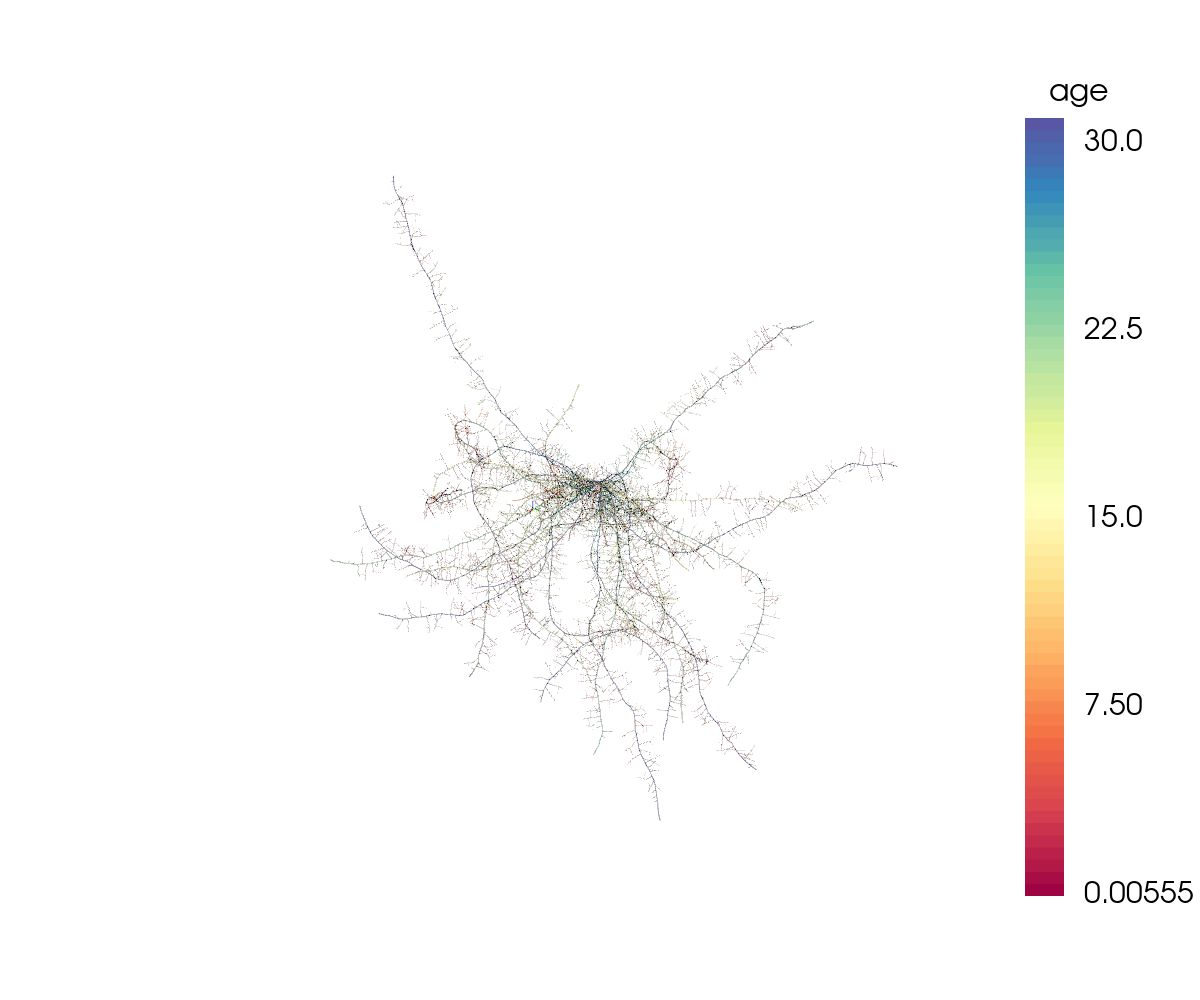

([<vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x149e8c60) at 0x7ed6d0c43520>,
  <vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x149e8e70) at 0x7ed6d0c436a0>],
 <vtkmodules.vtkRenderingAnnotation.vtkScalarBarActor(0x14e91150) at 0x7ed6d0c42b60>)

In [ ]:
# Create instance describing a root system
rs = pb.Plant()

# Open plant and root parameter from a file
path = sourcedir + "modelparameter/structural/rootsystem/"
# other parameter file names:
# Zea_mays_1_Leitner_2010, wheat_synMRI , Lupinus_albus_Leitner_2014, Anagallis_femina_Leitner_2010
name = "Zeamays_synMRI_modified"
rs.readParameters(path + name + ".xml")

# Simulate
rs.initialize() 
rs.simulate(30) # [days]

# Export
rs.write("first_example.vtp") # for Paraview
rs.write("first_example.rsml") # e.g. gui/viewer/rsml_viewer.py

# Visualize (e.g. "subType", "radius", "creationTime"); color code based on parameter
vp.plot_plant(rs, "age", interactiveImage = False) 

Multiple root systems are created in the very same way, see *example2a_initializeparams.py* (in CPlantBox/tutorial/examples/python/).

In this way a multitude of differently shaped root systems can be created. 

In [7]:
display(SVG(filename='figures/rootsystems.svg'))

### 2. Understanding model parameter

The seed contains the information to create the root system (and stem) and is defined by the class *SeedRandomParameter*. Each root type of emerging roots is represented by the class *RootRandomParameter*.

Specific plants and roots are presented by the classes *SeedSpecificParameter* and *RootSpecificParameter*. Instances of *SpecificParameter* classes are created (at organ creation) from the *RandomParameter* classes, usually by drawing specific random variables from a normal distribution, calling *RandomParameter::realize()*. 

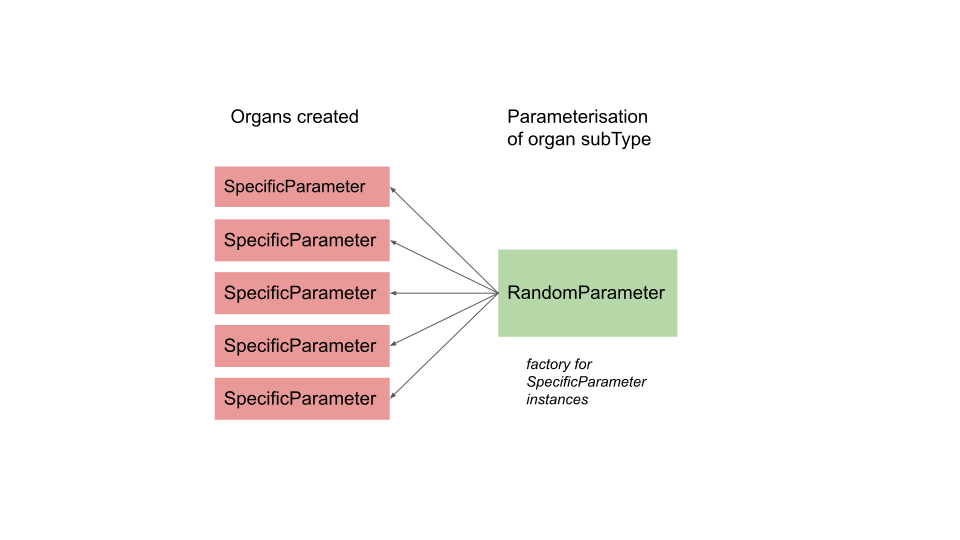

In [8]:
display(SVG(filename='figures/parameters.svg'))

This holds for all organs in CPlantBox: Seed, Root, Stem, and Leaf. In this summer school we focus on the roots. 

In [8]:
random_parameters = rs.getOrganRandomParameter(pb.root)
for p in random_parameters[1:]: # CPlantBox subTypes start at index 1
    print(p)

[Parameters of taproot]
Variable		Value		Deviation		Description
===
gf                	2		0			Growth function number [1]
organType         	2		-			Organ type (unspecified organ = 0, seed = 1, root = 2, stem = 3, leaf = 4)
subType           	1		-			Unique identifier of this sub type
tropismT          	1		-			Type of root tropism (plagio = 0, gravi = 1, exo = 2, hydro, chemo = 3)
a                 	0.0436		0			radius [cm]
dx                	0.5		-			Axial resolution [cm] (maximal segment size)
dxMin             	0.005		-			Axial resolution [cm] (minimal segment size)
hairsElongation   	0		-			Zone behind the tip without root hairs  [cm]
hairsLength       	0		-			Root hair length [cm]
hairsZone         	0		-			Length of the root hair zone [cm]
la                	0.569205		0			Apical zone [cm]
lb                	1.37664		0			Basal zone [cm]
ldelay            	6.15419		0			Lateral root emergence delay [day]
lmax              	150		0			Maximal root length [cm]
ln                	0.569205		0	

Most parameters are given by mean (parameter_name) and standard deviation (parameter_name+"s"). All random parameters can be accessed and changed (e.g. to reduce dx, or standard deviations)

Meaning of the variables of the *RootRandomParameter* class:

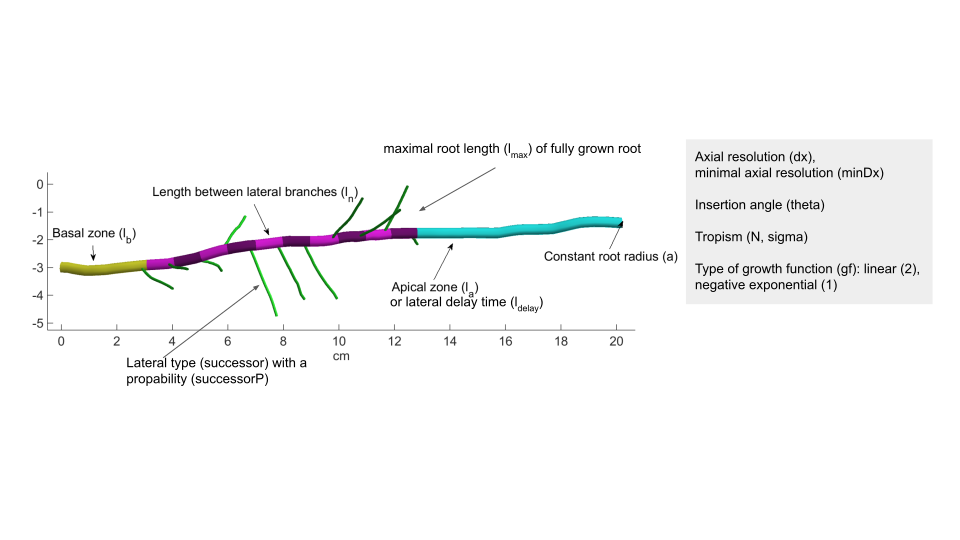

In [10]:
display(SVG(filename='figures/root_random_parameters.svg'))

The tropism parameters are given by the type of tropism (tropismT), N and sigma

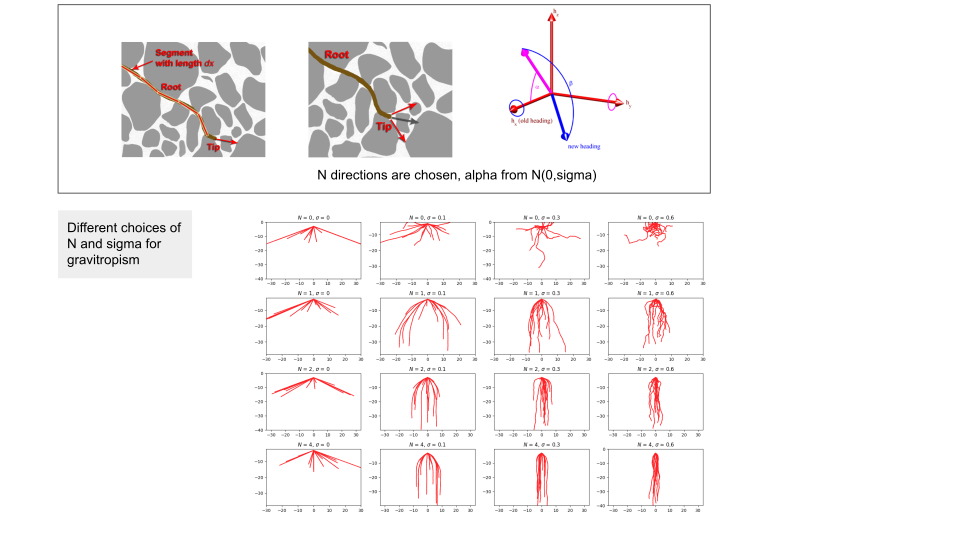

In [11]:
display(SVG(filename='figures/tropisms.svg'))

The example figure for gravitropism was created with the script *example2b_tropism.py* from the tutorial with an inertion angle of 70 degree (note that the figure will look different with another inserion angle). 

In [9]:
random_parameter = rs.getOrganRandomParameter(pb.seed)
print(type(random_parameter)) # it is eady to reveal the class type in Python
print()
print(random_parameter[0])

<class 'list'>

[Parameters of undefined]
Variable		Value		Deviation		Description
===
delayDefinition   	0		-			method implemented to evaluate root lateral growth delay (0: distance based, 1: delay based defined by parent organ)
delayDefinitionShoot	0		-			method implemented to evaluate shoot lateral growth delay (0: distance based, 1: delay based defined by parent organ)
maxTil            	0		0			Maximal number of tillers [1]
organType         	1		-			Organ type (unspecified organ = 0, seed = 1, root = 2, stem = 3, leaf = 4)
subType           	0		-			Unique identifier of this sub type
a                 	0.1		0			radius [cm]
delayB            	0.1		0			Time delay between the basal roots [day]
delayRC           	15		0			Delay between the root crowns [day]
delaySB           	1.5		0			Time delay between the shoot borne roots [day]
delayTil          	1e+09		0			Time delay between the tillers [day]
dx                	0.25		-			Axial resolution [cm] (maximal segment size)
dxMin             	

Most of above parameters are not important for dicots or young monocots (and some are ignored: a, dx, dxMin), some are for whole plants only (maxTi, firstTi).

For root systems the most important parameters are:

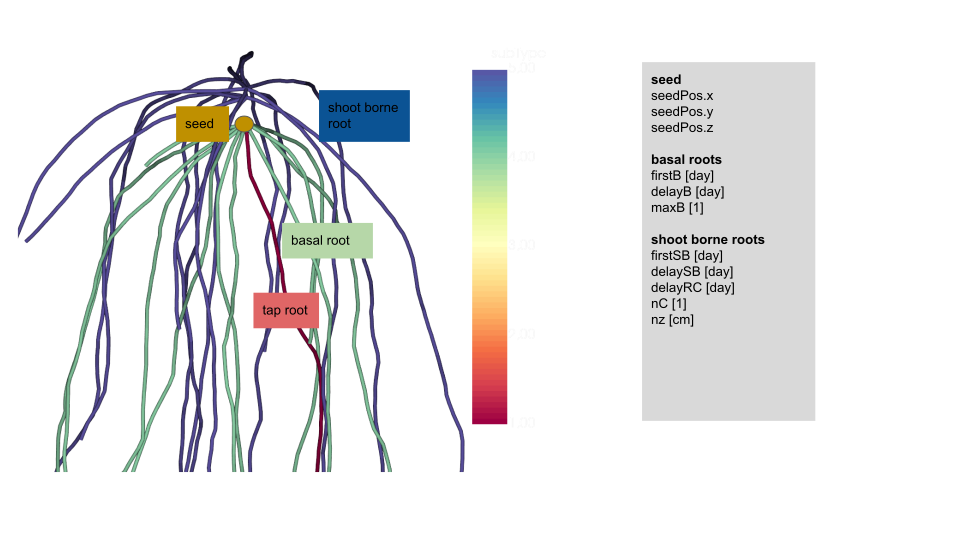

In [13]:
display(SVG(filename='figures/seed_params.svg'))

Some notes on Plant.initialize():

Seed::initialize: RootSystem 
Seed::initialize: Shoot borne definition is DEPRICATED, shoot borne roots will be handeled like basal roots 


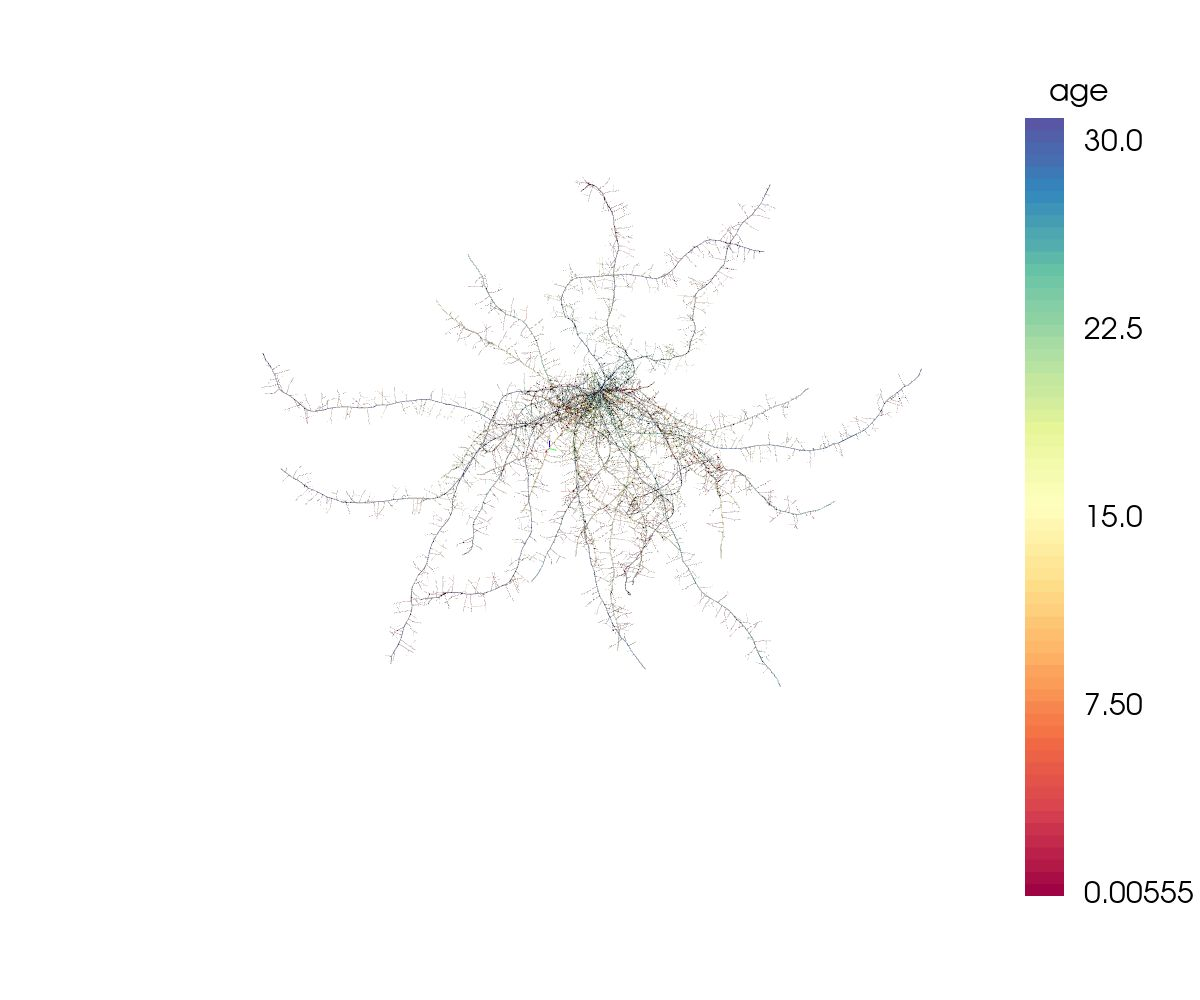

(<vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x1c110e20) at 0x7ed6d0c90760>,
 <vtkmodules.vtkRenderingAnnotation.vtkScalarBarActor(0xe19b430) at 0x7ed6d0c90520>)

In [20]:
# calling initialize will reset the simulation
#rs.initialize(True) # verbose = True # will call initializeLB(verbose)
#rs.initializeLB(True) # verbose = True # apical zone is length based
rs.initializeDB(True) # verbose = True # apical zone is delay based

rs.simulate(30) # [days]
vp.plot_roots(rs, "age", interactiveImage = False) # Plot, using vtk (e.g. "subType")

Access parameters:

In [ ]:
random_parameters = rs.getOrganRandomParameter(pb.root)
print(f"Apical length of root subType {random_parameters[1].subType} is {random_parameters[1].la} cm")
random_parameters[1].la = 10
for p in random_parameters[1:]:
    print(f"Maximal root length for subType {p.subType} is {p.lmax} cm sd {p.lmaxs}")

Apical length of root subType 1 is 10.0 cm
Maximal root length for subType 1 is 150.0 cm sd 0.0
Maximal root length for subType 2 is 2.29054 cm sd 0.0
Maximal root length for subType 3 is 0.94 cm sd 0.0
Maximal root length for subType 4 is 150.0 cm sd 0.0
Maximal root length for subType 5 is 150.0 cm sd 0.0


For root parameters subType 1 is always the tap root. SubType 2 and subType 3 refer to first and second order laterals. The occurance of basal or shootborne roots is defined within the seed parameters, and then are referred to as subType 4 , and subType 5. 

Change parameters, e.g. make the root system smaller

Seed::initialize: RootSystem 
Seed::initialize: Shoot borne definition is DEPRICATED, shoot borne roots will be handeled like basal roots 


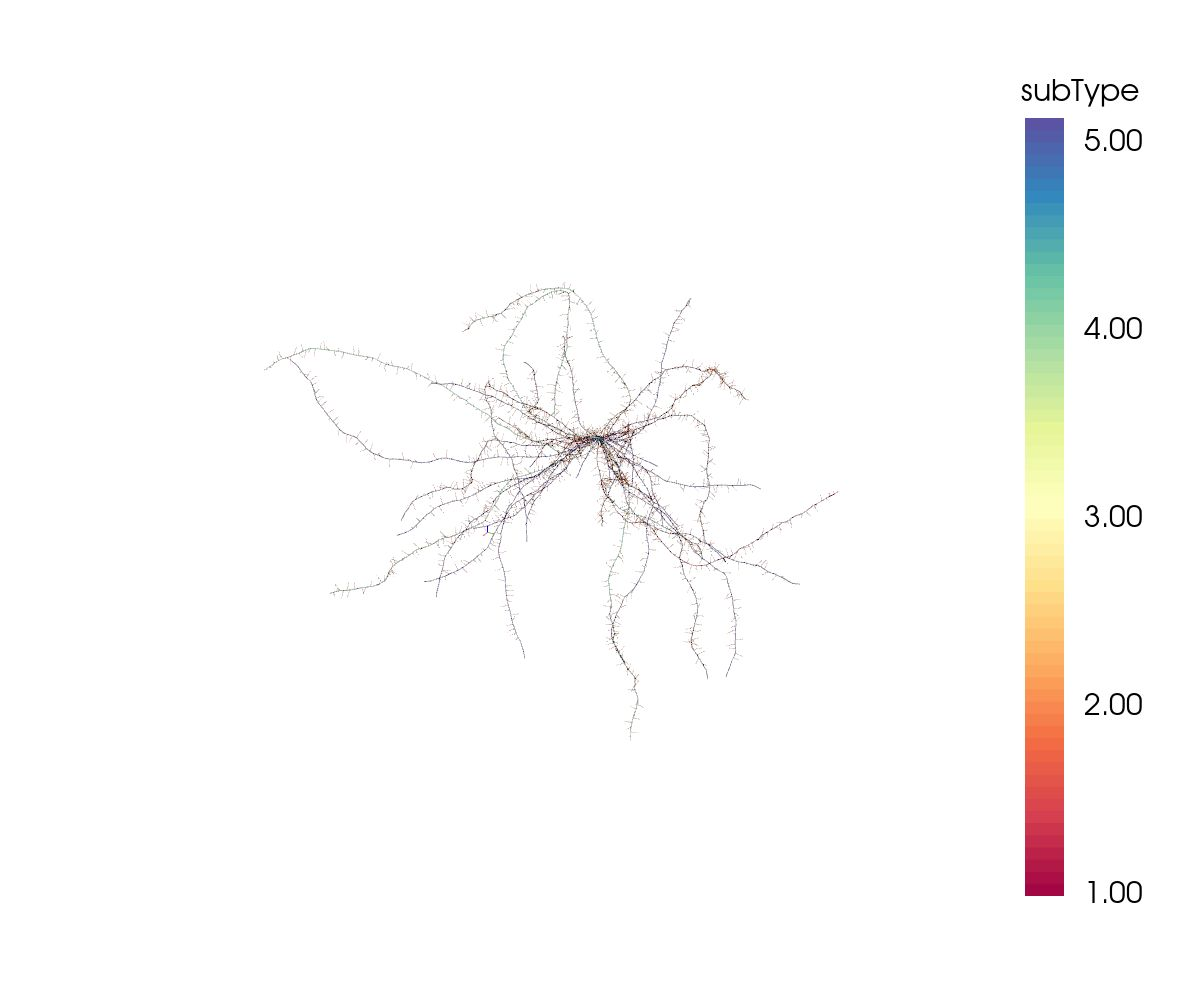

(<vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x162a8e80) at 0x7ed6d0c90100>,
 <vtkmodules.vtkRenderingAnnotation.vtkScalarBarActor(0x210e8060) at 0x7ed6d0c907c0>)

In [ ]:
rs = pb.Plant()
rs.readParameters(path + name + ".xml")
random_parameters = rs.getOrganRandomParameter(pb.root)
random_parameters[2].lb = 0. # length of basal zone [cm]
random_parameters[2].lbs = 0. # probs standard deviation of basal zone length [cm]
random_parameters[2].ln = 0. # interlateral distance [cm]
random_parameters[2].lns = 0. # probs standard deviation of interlateral distance [cm]
random_parameters[2].la = 0. # length of apical zone [cm]
random_parameters[2].las = 0. # probs standard deviation of apical zone length [cm]
random_parameters[2].lmax = 1  # maximal length [cm] of SubType 2 (first order laterals)
random_parameters[2].lmaxs = 0  # probs standard deviation of maximal length [cm]

rs.initialize() 
rs.simulate(30) 
vp.plot_roots(rs, "subType", interactiveImage = False) # Plot, using vtk 

The modified parameter set can be saved as xml parameter file. XML files can be conveniently viewed in a web browser. 

In [23]:
rs.writeParameters("modified_"+name + ".xml")

Specific root parameters can be accessed in similar way, but they should not be changed (since it is a simulation result). For postprocessing parameters can be obtained by using the organs *getParameter* function.

You do not need any parameter file, everything can be defined in the Python script from scratch:

Seed::initialize: RootSystem 


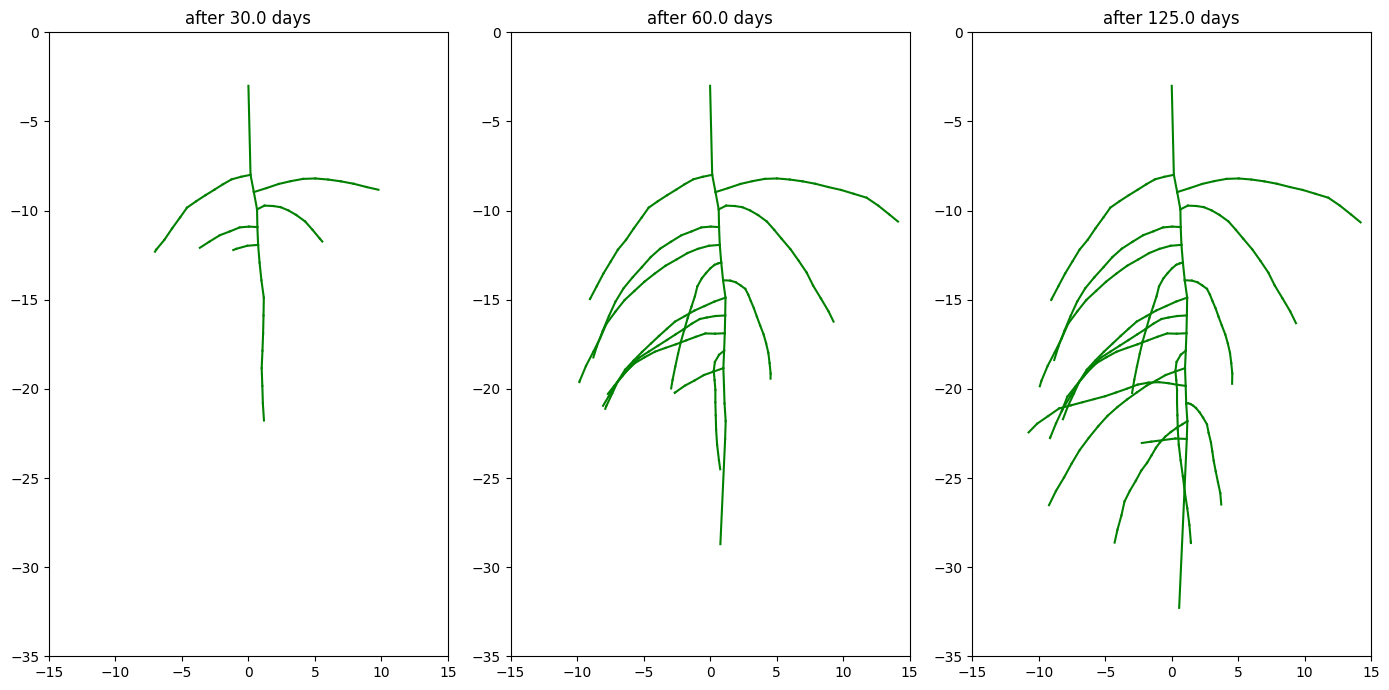

 length [29.53488439202972, 15.075513438626148, 14.849611872471678, 14.855820677536697, 14.850969909090487, 15.332013128286693, 14.958688205367787, 14.99631188039174, 14.969849606055318, 15.028864631623103, 15.050394701783448, 15.071770670726346, 14.9852189441056, 14.89492575159579, 14.875849712250867, 14.865016900512655, 3.7629836472398144]
    age [125.0, 105.18927926789135, 103.1885380329312, 101.04476911346686, 98.73593787938299, 96.23448961121147, 93.50533626503966, 90.50283250833019, 87.16606345502346, 83.41116916640328, 79.11814385718309, 74.1065213172881, 68.08640045342356, 60.5469676049964, 50.452800506360006, 35.1280317933803, 2.1696631333370746]
subType [1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
     la [10.0, 15.075526551712938, 14.849625549102091, 14.855839044054152, 14.850994854724284, 15.332067296586438, 14.958743853216506, 14.996397797046013, 14.969980725646385, 15.029091764893781, 15.05080359918085, 15.072579103570956, 14.9869

In [25]:
plant = pb.Plant()
p0 = pb.RootRandomParameter(plant)  # with default values,
p1 = pb.RootRandomParameter(plant)  # all standard deviations are 0

p0.name = "taproot"
p0.a = 0.2  # [cm] radius
p0.subType = 1  # [-] index starts at 1
p0.lb = 5  # [cm] basal zone
p0.la = 10  # [cm] apical zone
p0.lmax = 30  # [cm] maximal root length, number of lateral branching nodes = round((lmax-lb-la)/ln) + 1
p0.ln = 1.  # [cm] inter-lateral distance (16 branching nodes)
p0.theta = 0.  # [rad] angle between root and parent root
p0.r = 1  # [cm/day] initial growth rate
p0.dx = 10  # [cm] axial resolution
p0.successor = [[2]]  # add successors
p0.successorP = [[1]]  # probability that successor emerges
p0.tropismT = pb.TropismType.gravi  # tropism defined as gravitropism
p0.tropismN = 1.8  # [-] strength of tropism (number of trials)
p0.tropismS = 0.2  # [rad/cm] maximal bending

p1.name = "lateral"
p1.a = 0.1  # [cm] radius
p1.subType = 2  # [1] index starts at 1
p1.lmax = 15  # # [cm] apical zone
p1.lmaxs = 0.15  # [cm] standard deviation of the apical zone
p1.theta = 90. / 180.*np.pi  # [rad] angle between root and parent root
p1.r = 2  # initial growth rate
p1.dx = 1  # [cm] axial resolution
p1.tropismT = pb.TropismType.gravi  # tropism defined as gravitropism
p1.tropismN = 2  # [-] strength of tropism (number of trials)
p1.tropismS = 0.1  # [rad/cm] maximal bending

plant.setOrganRandomParameter(p0)
plant.setOrganRandomParameter(p1)

srp = pb.SeedRandomParameter(plant)  # with default values
srp.seedPos = pb.Vector3d(0., 0., -3.)  # [cm] seed position
srp.maxB = 0  # [-] number of basal roots (set to 0 --> neglecting basal roots and shoot borne)
srp.firstB = 10.  # [day] first emergence of a basal root
srp.delayB = 3.  # [day] delay between the emergence of basal roots
plant.setOrganRandomParameter(srp)

plant.initialize()

fig, axes = plt.subplots(1, 3, figsize = (14, 7))
simtimes = [0, 30, 60, 125]  # the last lateral will emerge at
for i in range(0, 3):

    plant.simulate(np.diff(simtimes)[i])  #  [day]
    a = axes[i]
    a.set_xlim([-15, 15.])
    a.set_ylim([-35., 0.])  # starts at -3 cm, max length of simple root system from scratch (without parameter files) 30 cm
    a.set_title(f"after {plant.getSimTime()} days")
    roots = plant.getPolylines()
    for root in roots:
        for j, n in enumerate(root[:-1]):
            n2 = root[j + 1]
            a.plot([n.x, n2.x], [n.z, n2.z], "g")

fig.tight_layout()
plt.show()

plant.write("/results/topics_parameters2.vtp")

# Some outputs.... (for each organ, i.e. root)
print(" length", plant.getParameter("length"))
print("    age", plant.getParameter("age"))
print("subType", plant.getParameter("subType"))
print("     la", plant.getParameter("la"))
print("la_mean", plant.getParameter("la_mean"))
print(" radius", plant.getParameter("radius"))

### 3. Using confining containers or obstacles
Confining geometry and obstacles can be defined using signed distance functions (SDF), classes are defined in *src/sdf.h*. 

Its always a good idea to define the soil volume (even if unconstrained), because otherwise roots may grow upwards out of the soil (which is normally not to be expected)!

Seed::initialize: RootSystem 


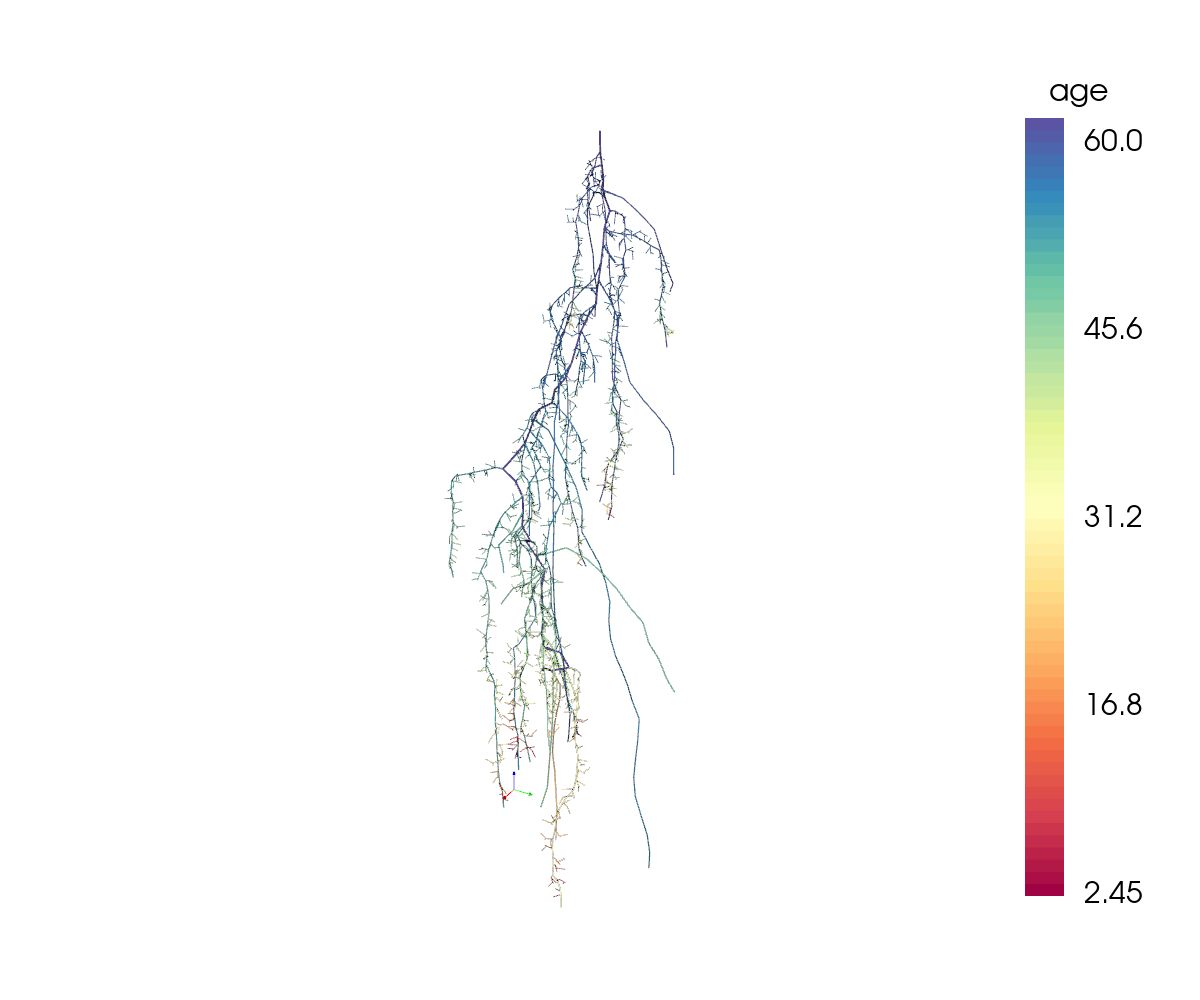

In [ ]:
rs = pb.Plant()
rs.readParameters(path + name + ".xml")
rs.setGeometry(pb.SDF_PlantBox(1.e6,1.e6,1.e6)) # length, width, height [-5.e5,5.e5] [-5.e5,5.e5] [0.,-1.e6]
rs.initialize()
rs.simulate(60)  # days
vp.plot_roots(rs, "age", interactiveImage = False) 

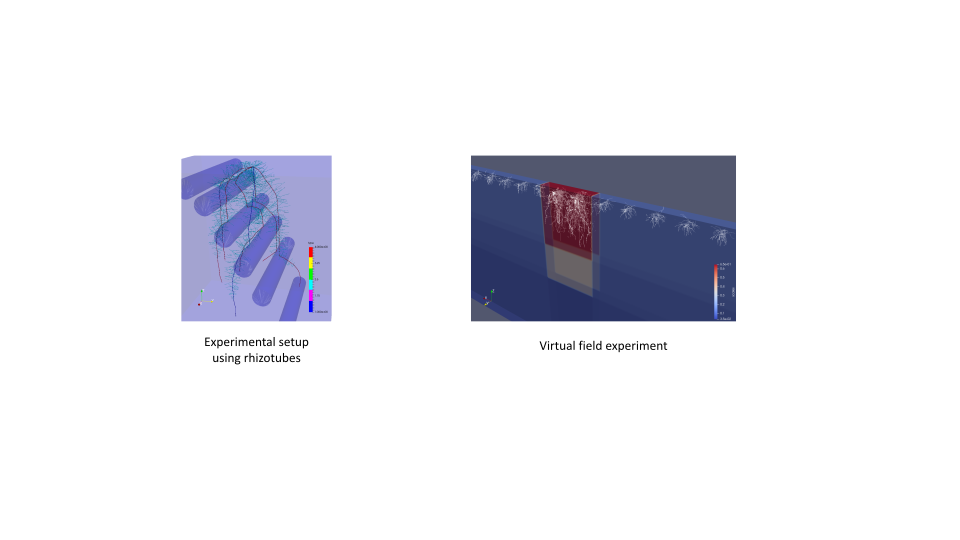

In [22]:
display(SVG(filename='figures/geometry.svg'))

Above graphs show virtual representations of actual field experiments. On the left we see a rhizotube set up, where horizontal tubes for observations with mini rhizotron cameras are located within the soil and act as obstacle to the roots. On the right we specify the red domain, using signed distance functions, to have different soil bulk density resulting in different root elongation rates. 

In the following we describe a split box experiment:

In [26]:
topBox = pb.SDF_PlantBox(22, 20, 5) # length, width, height [cm]
sideBox = pb.SDF_PlantBox(10, 20, 35)
left = pb.SDF_RotateTranslate(sideBox, pb.Vector3d(-6, 0, -5)) # creates two boxes from side box that are moved to left/ right of center & below top box
right = pb.SDF_RotateTranslate(sideBox, pb.Vector3d(6, 0, -5))
box_ = [topBox, left, right]
splitBox = pb.SDF_Union(box_) # combines top, left and right box into one shape
print(f"distance to next boundary: {topBox.getDist(pb.Vector3d(0, 0, -3))} cm")

distance to next boundary: -2.0 cm


In [ ]:
rs.setGeometry(splitBox)
rs.initialize()
rs.simulate(30)  # days
rs.write("splitbox.vtp")
_ = vp.plot_roots_and_container(rs, splitBox, "age", interactive = False) # interactive = true for rotating the 3d image in pop-up window

Seed::initialize: RootSystem 
Seed::initialize: Basal root type #4 was not defined, using tap root parameters instead
writing VTP... splitbox.vtp


The implemented functions can be found in src/sdf.h, and src/sdf.cpp. Set operations can be used on SDF. In this way obstacles are implemented, e.g. pb.SDF_Difference(soil_geom, obstacle_geom).

## 4. Basic root system traits and their dynamics

To analyse root traits dynamically we need to create a simulation loop.

A typical simulation loop will look like

In [29]:
rs = pb.Plant()
path = sourcedir + "modelparameter/structural/rootsystem/"
name = "Zea_mays_1_Leitner_2010"
rs.readParameters(path + name + ".xml")
rs.setGeometry(pb.SDF_PlantBox(1.e6,1.e6,1.e6)) 
rs.initialize(False)

""" Simulation loop """
simtime = 60.  # final simulation time [day]
dt = 1. # time step [day]
N = round(simtime / dt)  # number of iterations

for i in range(0, N):
    
    # Coupling to plant functional models or soil     
    
    rs.simulate(dt)
    
    # Coupling to plant functional models or soil 
    
    # Code for post-processing per time step (e.g. store relevant information in a list)
    

# Code for post-processing of the final result (write relevant results, e.g. csv, xls, etc.)
# _  = vp.plot_roots(rs, "subType", interactiveImage = False) # Plot, using vtk

### Analyse results from the class *Plant* directly (values per root) in a loop

The following example will plot length versus time for the root system, and each subType:

Seed::initialize: RootSystem 
Seed::initialize: Basal root type #4 was not defined, using tap root parameters instead


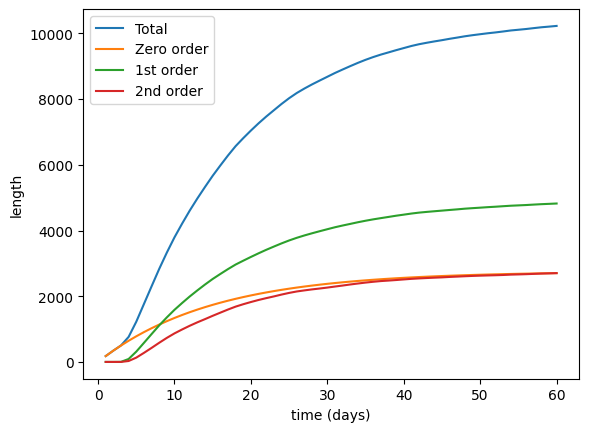

In [30]:
rs.initialize() # reset above simulation
scalar_type = "length" # set parameter to track; other options: "surface", "volume"
v_, v0_, v1_, v2_ = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N) # set of arrays to store values of tracked parameter

""" Simulation loop """
for i in range(0, N): # N number of iterations
    rs.simulate(dt) # dt time step
    t = np.array(rs.getParameter("subType")) # value per root; labels root segments based on root subtype
    v = np.array(rs.getParameter(scalar_type)) # all random or specific parameters are accessible
    v_[i] = np.sum(v)
    v0_[i] = np.sum(v[t == 1]) + np.sum(v[t == 4]) # main root (1) and basal roots (4)
    v1_[i] = np.sum(v[t == 2])
    v2_[i] = np.sum(v[t == 3])
    
t_ = np.linspace(dt, N * dt, N) # array of time values
plt.plot(t_, v_, t_, v0_, t_, v1_, t_, v2_)
plt.xlabel("time (days)")
plt.ylabel(scalar_type)
plt.legend(["Total", "Zero order", "1st order", "2nd order"])
# plt.savefig("myplot.png") # we could save it as png
plt.show()

The following code will plot histogram for root radii classes of the final simulation result:

Total length: 10576.437760171264 cm
Seed::initialize: RootSystem 
Seed::initialize: Basal root type #4 was not defined, using tap root parameters instead


(<vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor(0x1c111080) at 0x7ed6bb368e80>,
 <vtkmodules.vtkRenderingAnnotation.vtkScalarBarActor(0x11b387a0) at 0x7ed6bb7188e0>)

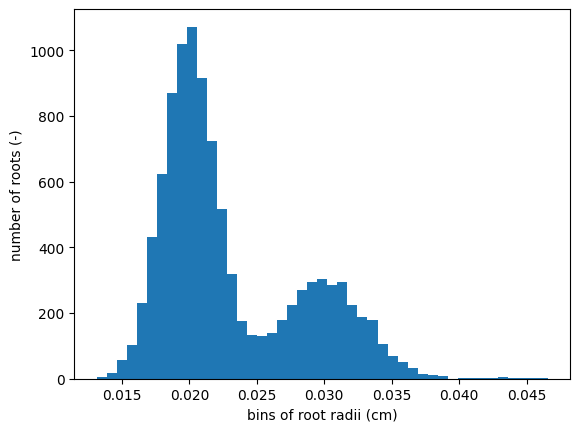

In [31]:
# Simulation
rs.initialize() # reset
rs.simulate(simtime)

# Post processing
print(f"Total length: {np.sum(rs.getParameter('length'))} cm")

a = rs.getParameter("radius")
_ = plt.hist(a, bins='auto')
_ = plt.xlabel("bins of root radii (cm)")
_ = plt.ylabel("number of roots (-)")

vp.plot_roots(rs, "subType") # Plot, using vtk 

Further interesting scalar traits that describe the extension of the root system are:

In [ ]:
from scipy.spatial import ConvexHull

nodes_ = rs.getNodes() # list of root system nodes
nodes = np.array([[n.x, n.y, n.z] for n in nodes_]) # numpy array of node coordinates

rooting_depth = np.min(nodes[:,2]) # lowest z value --> deepest point of the root system = rooting depth
horizontal_width = 2*np.max(np.sqrt(np.square(nodes[:,0])+np.square(nodes[:,1])))
# maximum of radial distance (sqrt(x^2 + y^2)) multiplied by two for both directions from stem at 0,0 --> horizontal width
convex_hull_volume = ConvexHull(nodes).volume

print("Rooting depth",rooting_depth, "cm")
print("Maximum width",horizontal_width, "cm")
print("Volume of the convex hull",convex_hull_volume, "cm^3")

Rooting depth -40.16849793957198 cm
Maximum width 30.086183300613737 cm
Volume of the convex hull 14083.432203583234 cm^3


### Analyse results using the class *SegmentAnalyser* (values per segment) 

The main functionality of the *SegmentAnalyser* class is:
* *getParameter(name)* as for *RootSystem* class, but returning a value for each segment, especially the "creationTime" of each segment
* *filter(name, min, max)* will keep only segments where the value of parameter *name* is within [min, max]
* *crop(sdf)* will keep only segments inside a geometry (e.g. in a soil core), segments intersecting the domain boundary are cut. 
* *distribution(...)* will create a 1d plot versus depth, where parameters are summed in layers 
* *distribution2d(...)* as above but 2d
* *mapPeriodic(length, width)* maps the unconstrained root system into a periodic domain
* *addData(name, data)* attach user data to the segments (e.g. simulation results for visualization or export)

Note that *SegmentAnalyser* is only loosly connected to the original simulation.

The first example shows how to obtain a depth distribution (values per segment) in a simulation loop.

Seed::initialize: RootSystem 


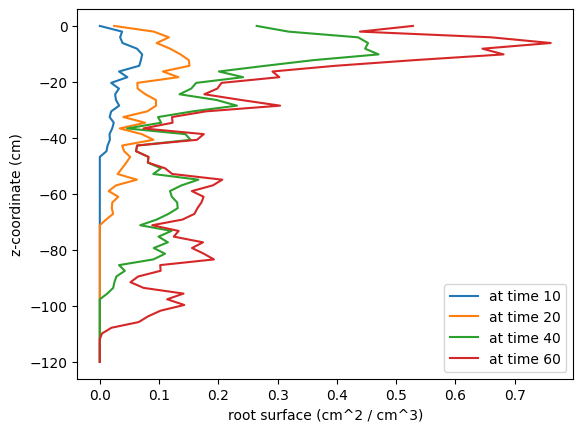

In [34]:
rs = pb.Plant()
path = sourcedir + "modelparameter/structural/rootsystem/"
name = "Moraesetal_2018"
rs.readParameters(path + name + ".xml")
rs.setGeometry(pb.SDF_PlantBox(1.e6,1.e6,1.e6)) # unbounded soil environment but sets prevents roots from growing upwards
rs.initialize()

simtimes = [0,10,20,40,60] # day
dt_ = np.diff(simtimes) # day
depth = 120 # cm
layers = 60 # [-]

""" Simulation loop """
rsd_ = []
for dt in dt_:    
    rs.simulate(dt)
    # _ = vp.plot_roots(rs, "subType") # to observe growth
    ana = pb.SegmentAnalyser(rs) # create a SegmentAnalyser object
    rsd = ana.distribution("surface", 0., -depth, layers, True) # paras: type, upper bound, lower bound, number of layers, cumulative (True/False)
    # False --> normalized distribution aka only segments whose midpoint is within the layer are considered
    rsd_.append(rsd) # store relevant data in a list

""" vizualize rld_ """
soilvolume = (depth / layers) * 10 * 10 # volume of soil layer [cm3]; assuming a horizontal extent of 10cm x 10cm
rsd_ = np.array(rsd_) / soilvolume  # convert to density [cm2/cm3]; root surface area per soil volume

z_ = np.linspace(0, -depth, layers)  # z - axis
for i, t in enumerate(simtimes[1:]):
    plt.plot(rsd_[i,:], z_, label = "at time "+str(t))

plt.xlabel("root surface (cm^2 / cm^3)")
plt.ylabel("z-coordinate (cm)")
plt.legend()
# plt.savefig("surface_density.png")
plt.show()
_ = vp.plot_roots(rs, "subType") # final result

Since the creation time (*creationTime*) of the segments is known, it is often sufficient to use pure post-processing when using the *SegmentAnalyser* class instead of loops. The following example shows the use of *mapPeriodic*, *filter()* and *crop()*.

The following code maps the root structure into a periodic domain. This approach is often used to mimic field conditions where the domain width is the inter-row distance and height is the inter-plant distance.

Unconstrained:
Minimum of bounding box ( -31.7365, -28.5097, -109.996 )
Maximum of bounding box ( 26.7789, 33.1169, -1.69768e-05 )

Periodic domain:
Minimum of bounding box ( -10, -5, -109.996 )
Maximum of bounding box ( 10, 5, -1.69768e-05 )


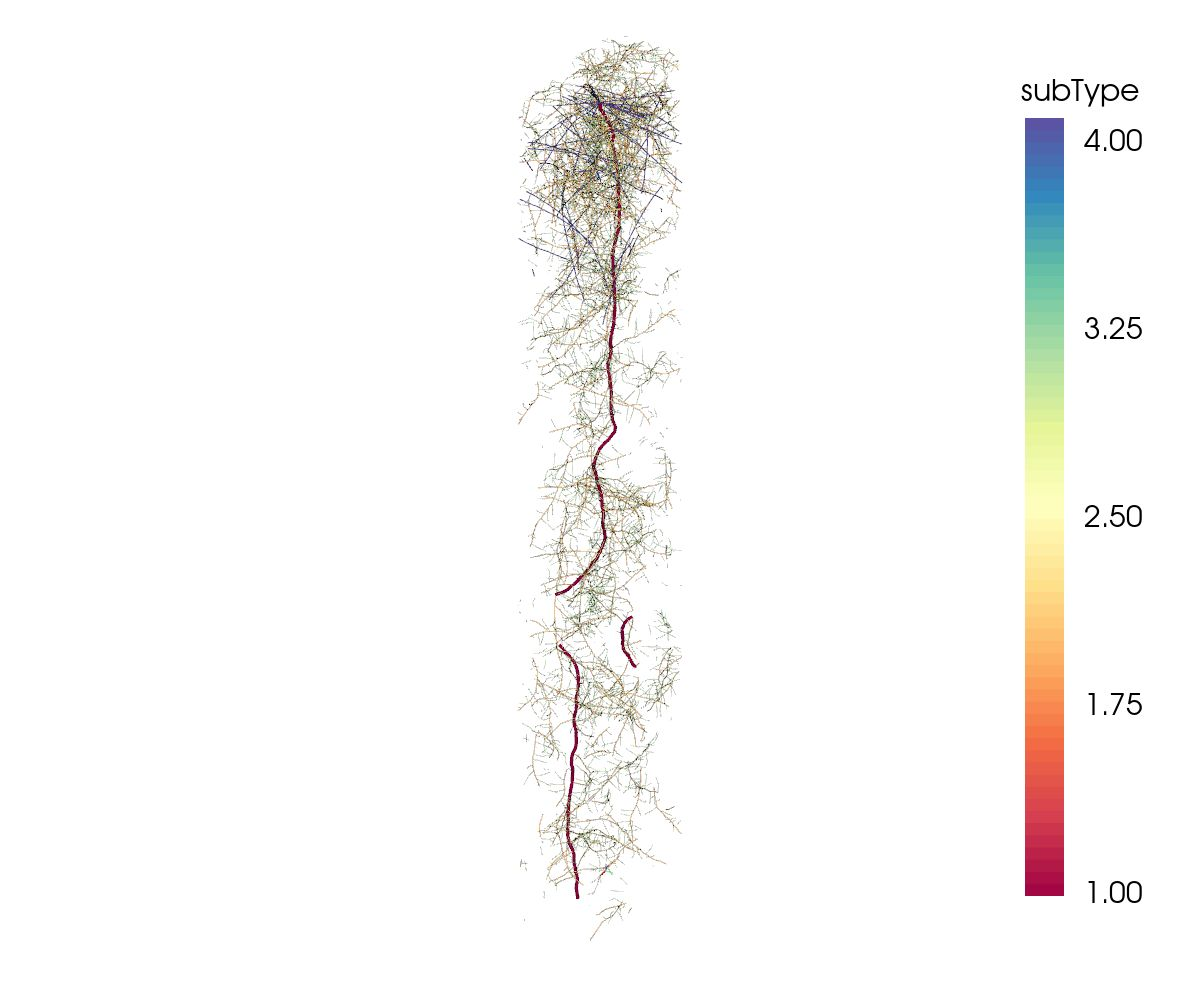

In [35]:
ana = pb.SegmentAnalyser(rs)
print("Unconstrained:")
print("Minimum of bounding box", ana.getMinBounds())
print("Maximum of bounding box", ana.getMaxBounds())
ana.mapPeriodic(20,10) # period in x and y direction [cm]; roots that leave the domain on one side will re-enter on the other side
print("\nPeriodic domain:")
print("Minimum of bounding box", ana.getMinBounds())
print("Maximum of bounding box", ana.getMaxBounds())
_ = vp.plot_roots(ana, "subType", interactiveImage = False) # plots the periodic root system

Next we show a virtual coring experiment on the periodic domain (of size inter-row times inter-plant distance). We define one core on top of the plant, and one that is shifted by 10 cm. We compare the root surface density profiles obtained from both soil cores to the mean root surface density of each periodic soil layer.

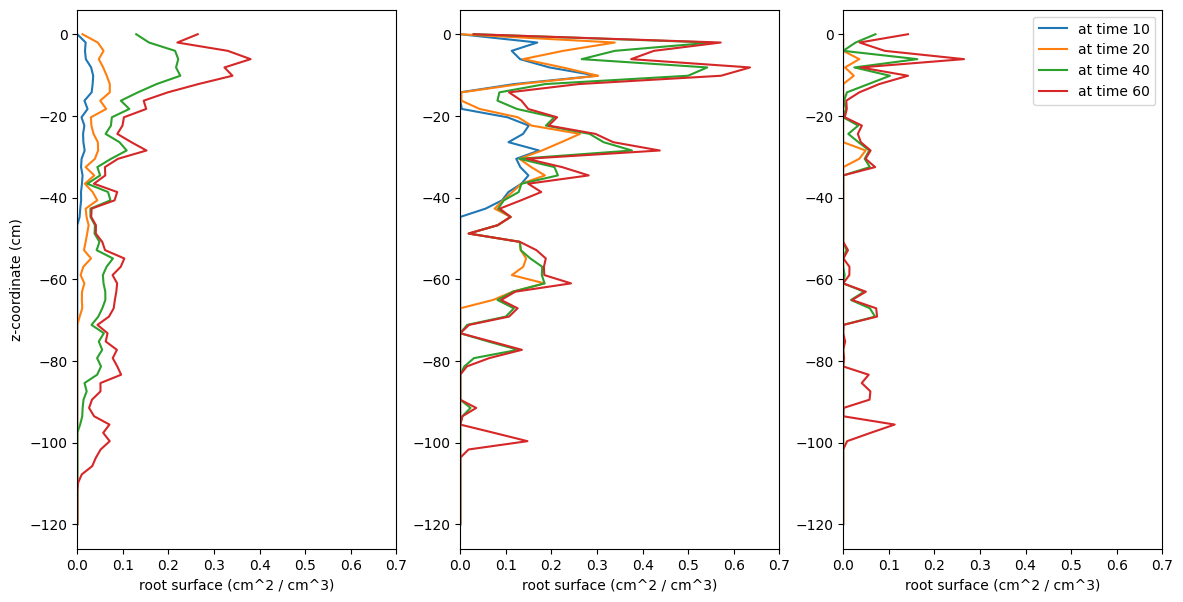

In [ ]:
r, depth, layers = 2., 120., 60  # Soil core analysis; radius, depth, number of layers per soil core

# soilcore1 --> main soil core centered at (0,0); soilcore2 --> second soil core shifted by 10 cm in x-direction
soilcore1 = pb.SDF_PlantContainer(r, r, depth, False)  # True = cubid, False = cylindric; params: radius x, radius y, depth, cuboid flag
soilcore2 = pb.SDF_RotateTranslate(soilcore1, 0, 0, pb.Vector3d(10., 0, 0))  # shift for 10 cm in x-direction; params: sdf, alpha, beta (rotations angles), translation vector

simtimes =  [0,10,20,40,60] # day
rsd_, rsd1_, rsd2_ = [], [], [] # rs distribution for all roots, soil core 1, soil core 2
for t in simtimes[1:]:
    a = pb.SegmentAnalyser(ana) # copy of segment analyser object of periodic root system
    a.filter("creationTime", 0, t) # keep segments with creation time in [0, time]
    rsd = a.distribution("surface", 0., -depth, layers, True) # total root surface distribution
    rsd_.append(rsd) # all
    a2 = pb.SegmentAnalyser(a) # create copy of a
    a2.crop(soilcore1) # crop to soil core 1
    rsd1 = a2.distribution("surface", 0., -depth, layers, True)
    rsd1_.append(rsd1) 
    a2 = pb.SegmentAnalyser(a)
    a2.crop(soilcore2)
    rsd2 = a2.distribution("surface", 0., -depth, layers, True)
    rsd2_.append(rsd2)

""" vizualize rsd_ """
soilvolume = (depth / layers) *r*r*np.pi # volume of soil layer [cm3]; cylindrical soil core with radius r
rsd_ = np.array(rsd_) / (20*10*(depth / layers))  # convert to density [cm2/cm3]; normalized to reference soil column of area 20cm x 10cm
rsd1_ = np.array(rsd1_) / soilvolume  # convert to density [cm2/cm3]
rsd2_ = np.array(rsd2_) / soilvolume  # convert to density [cm2/cm3]

fig, ax = plt.subplots(1, 3, figsize=(14, 7))
z_ = np.linspace(0, -depth, layers)  # depth points for plotting
for i, t in enumerate(simtimes[1:]):
    ax[0].plot(rsd_[i,:], z_, label = f"at time {t}")
    ax[1].plot(rsd1_[i,:], z_, label = f"at time {t}")
    ax[2].plot(rsd2_[i,:], z_, label = f"at time {t}")
    
for a in ax:
    a.set_xlabel("root surface (cm^2 / cm^3)")
    a.set_xlim([0,.7])
ax[0].set_ylabel("z-coordinate (cm)")

plt.legend()
# plt.savefig("surface_density.png")
plt.show()

# Group Excercise
Change the plant parameters according to the input parameters given for each group. How do the parameters affect the resulting root system?

subtype 0 is undefined
subtype 1 is taproot
subtype 2 is lateral
subtype 3 is tertiaryroots
subtype 4 is basal
subtype 5 is shootborne
Seed::initialize: Shoot borne definition is DEPRICATED, shoot borne roots will be handeled like basal roots 


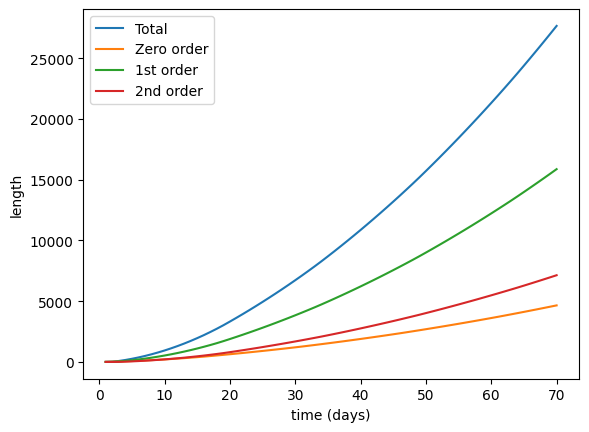

Total root length: 27668.44 cm | Surface area:  3718.67 cm2


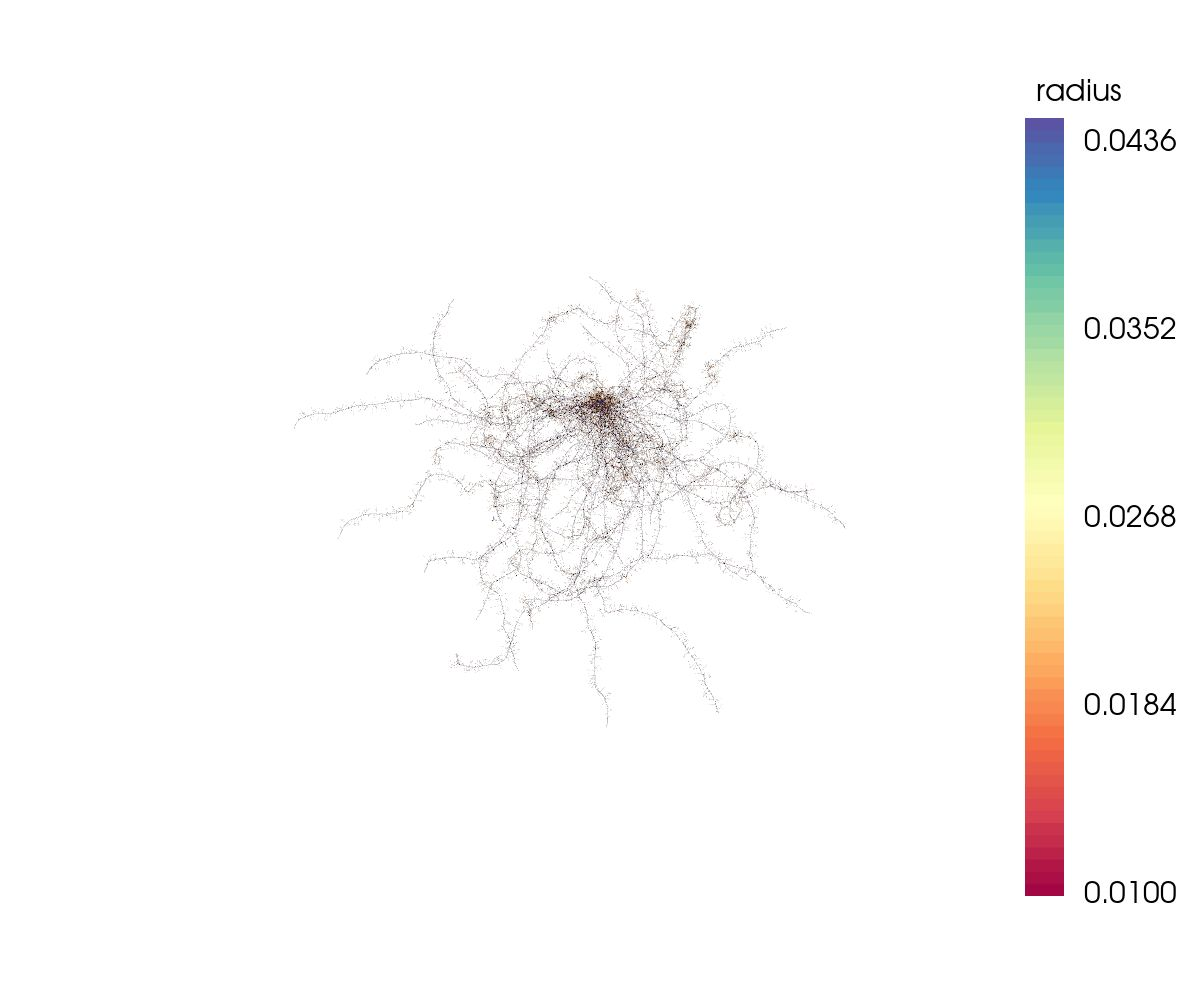

In [ ]:
sim_time = 70. 
dt = 1.
N = int(sim_time/dt)

name = "Zeamays_synMRI_modified" 
path = sourcedir + "modelparameter/structural/rootsystem/"  
plant = pb.MappedPlant()  
plant.readParameters(path + name + ".xml")


for p in plant.getOrganRandomParameter(pb.root): # values based on group parameter sets of summer school
    print('subtype',p.subType,'is', p.name)
    if (p.subType == 1):
        p.r = 2 # initial growth rate in [cm]; other value: 1.2
        p.ln = 1.7 # inter-lateral distance [cm]; other value: 0.69
        p.lmax = 165 # maximal length [cm]; other value: 135
        p.tropismS = 0.3 # tropism sensitivity [1/cm]; other value: 0.15
        pass
    if (p.subType == 4):
        p.r = 2 # initial growth rate in [cm]; other value: 1.2
        p.ln = 0.71 # inter-lateral distance [cm]; other value: 0.28
        p.lmax = 165 # maximal length [cm]; other value: 135
        p.tropismS = 0.3 # tropism sensitivity [1/cm]; other value: 0.15
        p.theta = 0.74 # angle [rad]; other value: 1.85
        pass
    if (p.subType == 5):
        p.r = 2 # initial growth rate in [cm]; other value: 1.2
        p.ln = 0.71 # inter-lateral distance [cm]; other value: 0.28
        p.lmax = 165 # maximal length [cm]; other value: 135
        pass

plant.initialize(False)

scalar_type = "length" # "surface", "volume"
v_, v0_, v1_, v2_ = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)

""" Simulation loop """
for i in range(0, N):
    plant.simulate(dt)
    t = np.array(plant.getParameter("subType")) # value per root
    v = np.array(plant.getParameter(scalar_type)) # all random or specific parameters are accessible
    v_[i] = np.sum(v)
    v0_[i] = np.sum(v[t == 1]) + np.sum(v[t == 4]) + np.sum(v[t == 5])
    v1_[i] = np.sum(v[t == 2])
    v2_[i] = np.sum(v[t == 3])
    
t_ = np.linspace(dt, N * dt, N)
plt.plot(t_, v_, t_, v0_, t_, v1_, t_, v2_)
plt.xlabel("time (days)")
plt.ylabel(scalar_type)
plt.legend(["Total", "Zero order", "1st order", "2nd order"])
# plt.savefig("myplot.png") # we could save it as png
plt.show()

total_length = np.sum(np.array(plant.getParameter("length")))
total_surface = np.sum(np.array(plant.getParameter("surface")))

print(f"Total root length: {total_length:8.2f} cm | Surface area: {total_surface:8.2f} cm2") #8.2f --> minimum width 8, 2 digits after comma, floating point
_ = vp.plot_roots(plant, "radius", interactiveImage = False) 